<a href="https://colab.research.google.com/github/sj2609/Introduction-to-Computational-Statistics-and-Statistical-Learning/blob/main/CSSL_05_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression
Let's try loading a dataset a dataset from Kaggle. To do this, you will need to [create a legacy API key from Kaggle](https://www.kaggle.com/settings). This will download a kaggle.json file.

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shreyasusanjoseph","key":"dde587671cff4e9f028074823cfa4cc7"}'}

In [3]:
# Change the permissions of the kaggle.json file such that only you can read/write the file.
# This is to prevent someone else from modifying the file.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!pip install -q kaggle # Install that Kaggle package to interact with Kaggle's datasets; pip is python's package manager   # what is pip install?

In [5]:
!kaggle datasets download -d nikhil7280/student-performance-multiple-linear-regression

Dataset URL: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression
License(s): other
  0% 0.00/48.5k [00:00<?, ?B/s]
100% 48.5k/48.5k [00:00<00:00, 213MB/s]


downloading another students dataset. It is downloading to somewhere in colab and not on your system. You can directly download it and then upload the file onto colab as well.


In [6]:
!unzip student-performance-multiple-linear-regression.zip

Archive:  student-performance-multiple-linear-regression.zip
  inflating: Student_Performance.csv  


In [7]:
# Import necessary packages
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [8]:
os.listdir() # Look for the files/directories within the current directory

['.config',
 'Student_Performance.csv',
 'kaggle.json',
 'student-performance-multiple-linear-regression.zip',
 'sample_data']

The Student_Performance.csv is available!

In [10]:
data = pd.read_csv("Student_Performance.csv") # Read the csv file into a pandas dataframe
type(data)

pandas.core.frame.DataFrame

In [14]:
data.head() # Print the first 5 rows of the dataframe
# there are 5 features in total

data.shape    # gives the dimensions


(10000, 6)

In [15]:
data.info() # Gives basic information about the dataframe

# what is Dtype in python?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [18]:
data.describe() # Gives basic statistics about the columns of the dataframe

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


In [21]:
data["Extracurricular Activities"]     # extracting specific column
data['Extracurricular Activities'].unique() # what does this do

array([1, 0])

In [17]:
encoder = LabelEncoder()    # converts yes and no to binary values

data["Extracurricular Activities"] =  encoder.fit_transform(data["Extracurricular Activities"])

In [23]:
data.iloc[2:5]    # extarcts specific rows

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [24]:
data["Hours Studied"].mean()

np.float64(4.9929)

In [26]:
X = data.drop(columns = "Performance Index")     # drops the column
y = data["Performance Index"]

What are hyperparameters?

In [27]:
X.sample(5)         # sample without replacement and not ordered as well

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
4604,4,81,1,8,4
5983,8,40,0,7,7
6529,1,98,0,9,1
5247,4,87,1,8,4
2683,3,53,1,9,8


In [28]:
y.sample(5)

,Performance Index
5329,68.0
3717,59.0
8260,44.0
8752,75.0
3710,69.0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)     # how does this code work?
# random state is like seed, it will set a random number to start the sequence for sampling.
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)         # without 2 entry means without column

(8000, 5) (8000,) (2000, 5) (2000,)


In [30]:
model = LinearRegression()    # defining the type of model
model.fit(X_train,y_train)

LinearRegression()

In [31]:
model.score(X_train, y_train)

0.9886898790682355

In [32]:
help(model.score)       # returns r^2 value is what model.score does, r^2 is the coefficient of determination.

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Return the coefficient of determination of the prediction.

    The coefficient of determination :math:`R^2` is defined as
    :math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
    sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
    is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always predicts
    the expected value of `y`, disregarding the input features, would get
    a :math:`R^2` score of 0.0.

    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, where ``n_s

In [33]:
predict = np.round(model.predict(X_test), decimals = 1)

In [34]:
pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

,Actual Performance,Predicted Performance
6252,51.0,54.7
4684,20.0,22.6
1731,46.0,47.9
4742,28.0,31.3
4521,41.0,43.0
...,...,...
6412,45.0,46.9
8285,66.0,62.7
7853,16.0,16.8
1095,65.0,63.3


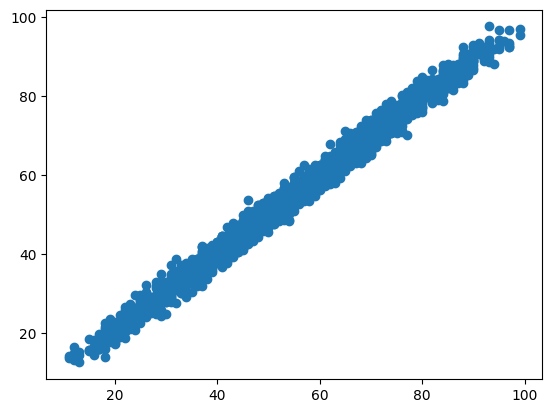

In [35]:
plt.scatter(y_test, predict)    # y_text is on the x-axis and predict is on the y-axis
plt.show()

In [36]:
r2_score(y_test,predict)

0.9889704960519785

In [37]:
model.coef_, model.intercept_      # these values correspond to beta values (parameters) of each feature

(array([2.85248393, 1.0169882 , 0.60861668, 0.47694148, 0.19183144]),
 np.float64(-33.92194621555638))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8000, 5) (8000,) (2000, 5) (2000,)


In [39]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [40]:
model.score(X_train, y_train)

0.9886898790682355

In [41]:
predict = np.round(model.predict(X_test), decimals = 1)

In [43]:
pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

,Actual Performance,Predicted Performance
6252,51.0,54.7
4684,20.0,22.6
1731,46.0,47.9
4742,28.0,31.3
4521,41.0,43.0
...,...,...
6412,45.0,46.9
8285,66.0,62.7
7853,16.0,16.8
1095,65.0,63.3


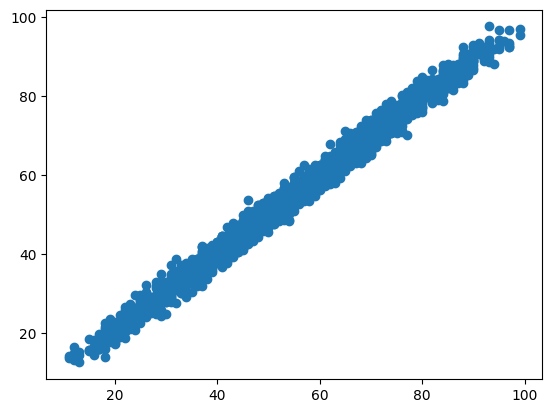

In [42]:
plt.scatter(y_test, predict)
plt.show()

In [ ]:
r2_score(y_test,predict)

In [ ]:
model.coef_, model.intercept_

## Try performing simple linear regression on each of these features indvidually

In [44]:
X_single_feature = data.drop(columns=["Sleep Hours", "Previous Scores", "Extracurricular Activities",	"Hours Studied", "Performance Index"])
y = data["Performance Index"]
X_single_feature

,Sample Question Papers Practiced
0,1
1,2
2,2
3,2
4,5
...,...
9995,2
9996,5
9997,5
9998,0


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_single_feature, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8000, 1) (8000,) (2000, 1) (2000,)


In [46]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [47]:
model.score(X_train, y_train)

0.001926123641118882

In [49]:
predict = np.round(model.predict(X_test), decimals = 1)

In [50]:
pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

,Actual Performance,Predicted Performance
6252,51.0,54.5
4684,20.0,56.3
1731,46.0,55.4
4742,28.0,55.4
4521,41.0,55.7
...,...,...
6412,45.0,54.8
8285,66.0,54.8
7853,16.0,54.5
1095,65.0,55.4


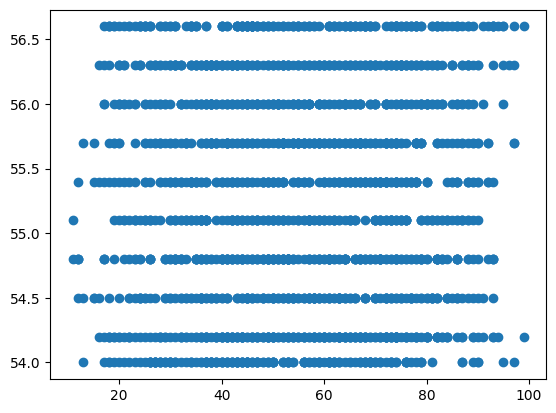

In [51]:
plt.scatter(y_test, predict)
plt.show()

In [52]:
r2_score(y_test,predict)

0.0010087588083272925

In [53]:
model.coef_, model.intercept_

(array([0.29453398]), np.float64(53.951783879471684))

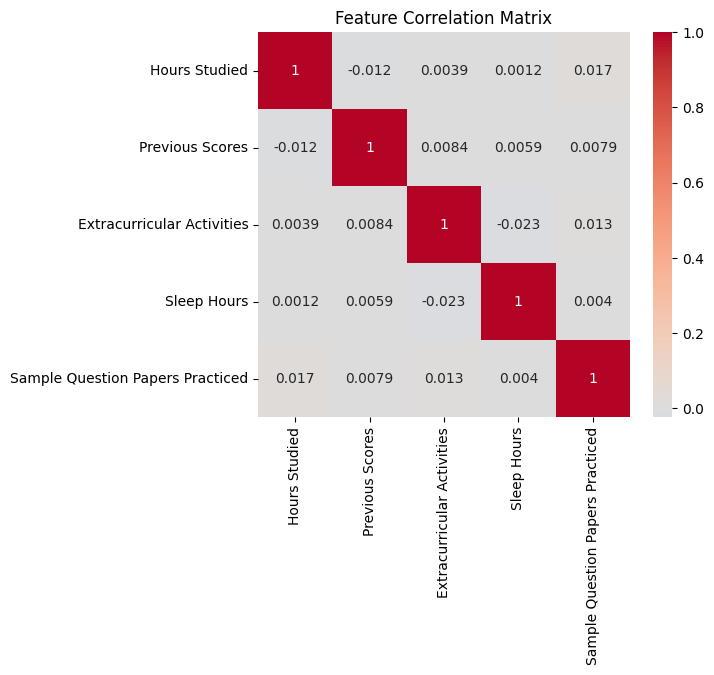

In [54]:
import seaborn as sns
corr = X.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix")
plt.show()

Let's try adding some correlation between Hours Studied and Question Papers Practiced

In [ ]:
X

In [55]:
X["Hours Studied Correlated"] = round(X["Hours Studied"] - 0.1*X["Previous Scores"] + 0.1 * np.random.randn(len(X)))
X["Hours Studied Correlated"] = X["Hours Studied Correlated"].clip(lower=0)
X = X.drop(columns=["Hours Studied"])
X

,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Hours Studied Correlated
0,99,1,9,1,0.0
1,82,0,4,2,0.0
2,51,1,7,2,3.0
3,52,1,5,2,-0.0
4,75,0,8,5,-0.0
...,...,...,...,...,...
9995,49,1,4,2,0.0
9996,64,1,8,5,1.0
9997,83,1,8,5,0.0
9998,97,1,7,0,0.0


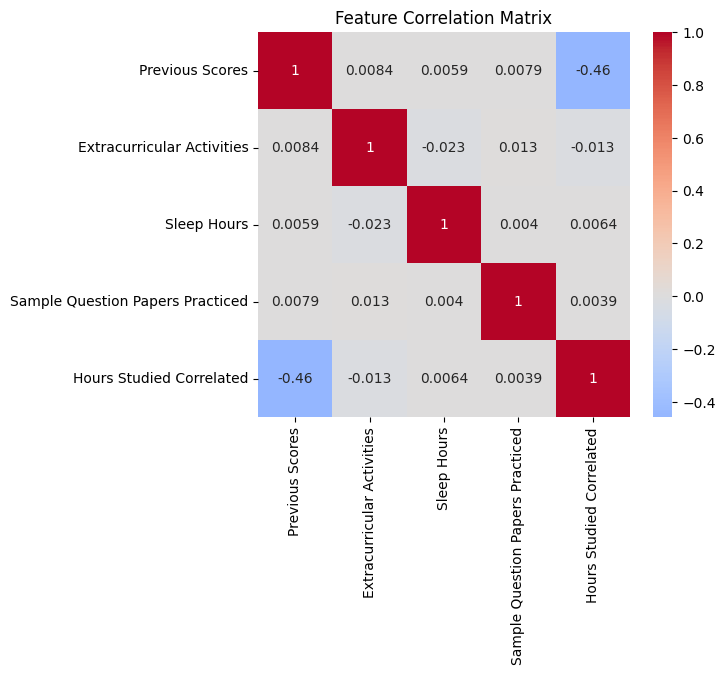

In [56]:
import seaborn as sns
corr = X.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix")
plt.show()

In [57]:
# take the multiple linear model and do it with the simple linear model
r2_score(y_test,predict)

0.0010087588083272925